# Manipulation des matrices et des vecteurs avec NumPy

![image](./images/numpy.png)

# NumPy

NumPy est un package Python spécialement adapté à la manipulation de matrices ou de tableaux multidimensionnels et possédant des fonctions mathématiques opérant sur ces tableaux.

Numpy est l'outil de référence pour travailler sur des données non structurées.

Généralement pour simplifier l’appel aux fonctions NumPy, on utilise :
```
import numpy as np
```
Il est installé par défaut dans la suite Anaconda.

In [1]:
import numpy as np

# Numpy, les origines de la data en Python

- Numpy est le premier package de traitement de données en Python
- Il est basé sur un ensemble de fonctions codées en C
- Il combine une classe : les ndarray et des fonctions universelles
- Il est le socle de la plupart des packages de data science

Numpy utilise des array
- un array est l'équivalent d'un tenseur
- un array à unedimension est un vecteur
- un array à deux dimensions est une matrice

On utilise les arrays pour travailler sur des données non structurées :
- une image est représentée par un array à 3 dimensions
- une vidéo est représenté par un array à 4 dimensions
- ...

# NumPy et les arrays

- Les arrays sont des structures centrales pour travailler en data science. 
- Les arrays de NumPy sont utilisées comme des vecteurs ou des matrices
- On crée un array en utilisant la fonction `np.array()`, on peut créer un array à partir d’une liste ou de plusieurs listes
- Les arrays ne se compose que d’un type de données (dans sa forme classique)
- Pour connaître la taille d’un array, on utilise la fonction `.shape`
- Pour connaître le type de données dans l’array, on utilise `.dtype`

In [2]:
#1er array
arr1 = np.array([3.4,5,7])
print(arr1.shape,arr1.dtype)

(3,) float64


In [3]:
arr1.shape

(3,)

In [4]:
type(arr1)

numpy.ndarray

In [5]:
arr1.dtype

dtype('float64')

In [6]:
arr1.mean()

5.133333333333334

## Un peu de vocabulaire

- Les dimensions sont appelées `axis` (`axis=0` : colonnes, `axis=1` : lignes)
- Le nombre de dimensions est appelé `.ndim`
- La taille (`.size`) est le nombre total d’éléments d’un array
- La forme est associée à `.shape`

# Numpy et les arrays

On peut générer des arrays de manière simple :

In [7]:
np.array([4,5,4 ], dtype=float)

array([4., 5., 4.])

In [8]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [9]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [10]:
np.empty(5)

array([0., 0., 0., 0., 0.])

In [11]:
np.full((2,3), 10)

array([[10, 10, 10],
       [10, 10, 10]])

# D'autres générateurs d'arrays

- `np.arange(5)` pour créer un array de taille 5 avec des valeurs de 0 à 4, on peut utilise `start=`, `stop=` et `step=`
- On peut utiliser arange avec des float mais on préfère généralement `np.linspace`
    - Cette fonction génère un nombre donné de valeur équidistante entre deux bornes


In [12]:
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

# Premières opérations arithmétiques

Les opérations arithmétiques de bases se font terme à terme

`*`, `+`, `-`, `/`, `**` (puissance), `%` (modulo)


In [13]:
arr2 = np.arange(1,4)

In [14]:
print(arr2+arr2)
print(arr2*arr2)
print(arr2/arr2)
# attention les vecteurs doivent avoir les mêmes dimensions

[2 4 6]
[1 4 9]
[1. 1. 1.]


In [15]:
arr3= np.array([3,6,8,2])

In [16]:
try:
    arr2 + arr3
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (3,) (4,) 


## Un cas spécifique : le broadcasting

Dans certains cas, on peut affectuer des calculs entre des arrays de tailles différentes.

Pour pouvoir faire cela, il suffit d'avoir une dimension commune, on a :

In [17]:
arr_id=np.eye(3)
arr_id

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
arr_id + arr2

array([[2., 2., 3.],
       [1., 3., 3.],
       [1., 2., 4.]])

In [19]:
arr_rect = np.full((2,3), 10)

In [20]:
arr_rect

array([[10, 10, 10],
       [10, 10, 10]])

In [21]:
arr2+arr_rect

array([[11, 12, 13],
       [11, 12, 13]])

### Le broadcasting sur une image avec NumPy

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
image_paris=plt.imread("./data/tour-eiffel.png")

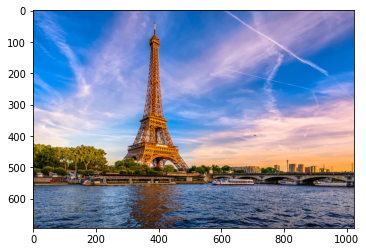

In [24]:
plt.imshow(image_paris)

In [25]:
print(type(image_paris), image_paris.dtype, image_paris.shape)

<class 'numpy.ndarray'> float32 (694, 1024, 3)


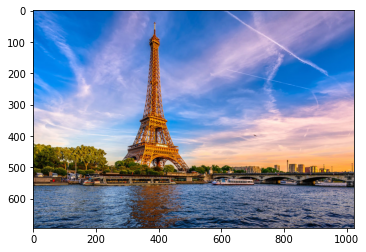

In [26]:
plt.imshow(image_paris*np.array([1,1,1]))

**Exercice :** Essayez de modifier les couleurs de cette image

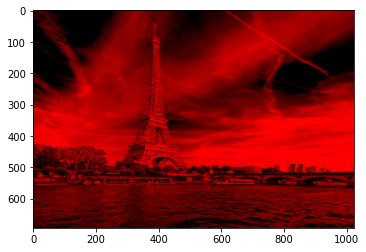

In [27]:
image_rouge = image_paris*np.array([1,0,0])
plt.imshow(image_rouge)
plt.imsave("paris_rouge.png", image_rouge)

# Manipulation d'arrays

L'indexation des arrays est similaire à celle des listes :
- Accéder à un élément : `arr1[i]`
- Si on veut plusieurs éléments, on peut utiliser `arr1[i:j]`
- On peut aussi fixer des valeurs pour plusieurs éléments : `arr1[i:j]=100`
- On peut aussi modifier toutes les valeurs de l’array : `array[:]=100`
- Si on veut garder l’array initial on utilise `.copy()`


**Exercice :**
    
Essayez d'extraire une partie de l'image (la tour Eiffel)

*Indice :* On regarde les coordonnées sur l'image et on construit une sous-matrice

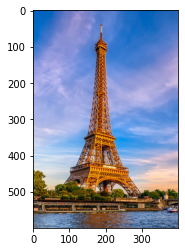

In [28]:
plt.imshow(image_paris[ :600, 200:600, :])

In [29]:
image_paris[0:500,250:500] = image_paris[0:500,550:800]

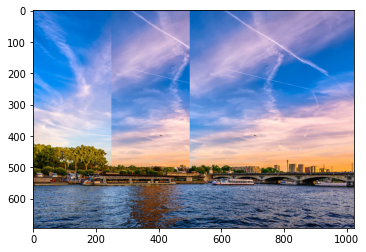

In [30]:
plt.imshow(image_paris)

# Changement de dimension

Le seule attribut qui change est `.shape`, on peut utiliser la méthode `.reshape()`

In [31]:
arr_2dim = np.arange(10).reshape(5,2)

In [32]:
# Pour fixer une valeur pour tous les éléments d’une ligne, on utilise 
arr_2dim[2] = 22
# Pour fixer une valeur pour un seul élément, on utilise 
arr_2dim[3,1] = 33
# On peut aussi sélectionner des sous-parties d’un array à 2 dimensions

# Opérations matricielles sur les arrays

On peut créer une matrice (un array) en utilisant la fonction `.reshape` :
- Pour créer une matrice 4 x 5 à partir d’une suite de 20 nombres, on utilise :
```
np.arange(20).reshape((4,5))
```
- Transposée : `.T`
- Produit matriciel `np.dot()`

**Exercice :**

Construire une matrice rectangulaire de taille 3 x 2 avec une suite de nombres commençant à 5, calculer le produit de la transposée par la matrice.

In [33]:
array_entiers = np.arange(5,11).reshape(3,2)
array_entiers

array([[ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [34]:
arr_mat = array_entiers.T.dot(array_entiers)
arr_mat

array([[155, 176],
       [176, 200]])

In [35]:
arr_mat = np.dot(array_entiers.T,array_entiers)

arr_mat = np.dot(np.transpose(array_entiers),array_entiers)

arr_mat = array_entiers.transpose().dot(array_entiers)

In [36]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert arr_mat[1,1] == 200
print("Bravo !")

Bravo !


# Les fonctions universelles sur les arrays
NumPy possède de nombreuses fonctions sur les arrays permettant de manipuler des arrays
- `np.where(condition, A, B)` permet de faire une condition de manière simple
- `np.sum()`
- `np.mean()`
- `np.std()`
- `np.var()`
- `np.median()`
- `np.percentile()`
- `np.average()` : moyenne pondérée


Sur des booléens :
- `np.any()` au moins un `True`
- `np.all()` tous `True`

Les tris :
- `np.sort()`
- `np.argsort()`

Sur des chaînes :
- `np.unique()` permet d’obtenir chaque valeur unique
- `np.in1d(,)` permet de vérifier si les éléments du 1er membre se trouvent dans le second



**Exercice :**

Générer un array de nombres aléatoires `np.random.randn()` puis remplacer les valeurs plus petites que  0 par 0.

*Indice :* On peut utliser `np.where(condition, vrai, faux)`

In [37]:
array_aleat = np.random.randn(10000)

In [38]:
array_positif = np.where(array_aleat<0,0,array_aleat)

In [39]:
%timeit array_positif = np.where(array_aleat<0,0,array_aleat)

80.3 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%%timeit
array_positif = array_aleat.copy()
for i, val in enumerate(array_aleat):
    if val<0:
        array_positif[i]=0


4.91 ms ± 86.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert array_positif.min() == 0
print("Bravo !")

Bravo !


# Sauvegarder et charger des arrays

On utilise :
- `np.save('mon_array',mon_array)` pour sauver un array
- `np.load('mon_array.npy')` pour charger un array
- `np.savez('ziparray.npz', x=mon_array, y=mpn_array2)` sauvegarder en zip plusieurs arrays
- `np.savetxt('textfile.txt', mon_array, delimiter=';')` pour sauvegarder un array dans un fichier texte
- `np.loadtxt('textfile.txt', delimiter=';')` pour charger un array depuis un fichier texte


In [42]:
%time np.save("arr_pos.npy",array_positif)

CPU times: user 1.65 ms, sys: 0 ns, total: 1.65 ms
Wall time: 1.2 ms


In [43]:
%time np.savetxt("arr_pos.txt",array_positif)

CPU times: user 24.7 ms, sys: 0 ns, total: 24.7 ms
Wall time: 24.1 ms


In [44]:
del array_positif

In [45]:
%time array_positif = np.load("arr_pos.npy")

CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 866 µs


In [46]:
%time array_positif = np.loadtxt("arr_pos.txt")

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 36.1 ms
